In [293]:
import pandas as pd

In [294]:
messages = pd.read_csv('SMSSpamCollection', sep="	", header=None)
messages

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [297]:
from sklearn.model_selection import train_test_split

y = messages[0].map({'spam' : 1, 'ham': 0})
X = messages.drop(columns= 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=88)
X_train.shape, X_test.shape

((3900, 1), (1672, 1))

In [298]:
print(y_train.value_counts())
print(y_test.value_counts())

0    3377
1     523
Name: 0, dtype: int64
0    1448
1     224
Name: 0, dtype: int64


In [299]:
# Baseline accuracy
print('ACC', 1448/(1448 + 224))

ACC 0.8660287081339713


### Text cleaning

In [300]:
#change to lowercase
text = messages[1] #select text
text = text.str.lower() 
text

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: 1, Length: 5572, dtype: object

In [301]:
#remove punctuations
from string import punctuation

def remove_punctuation(document):

    no_punct = ''.join([character for character in document if character not in punctuation])
    
    return no_punct

text_no_punct = text.apply(remove_punctuation)
text_no_punct 

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ü b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: 1, Length: 5572, dtype: object

In [302]:
#remove digits
def remove_digit(document): 
    
    no_digit = ''.join([character for character in document if not character.isdigit()])
              
    return no_digit

text_no_digit = text_no_punct.apply(remove_digit)
text_no_digit

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in  a wkly comp to win fa cup final...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the nd time we have tried  contact u u...
5568                  will ü b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: 1, Length: 5572, dtype: object

In [303]:
#tokenize
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

text_tokenized = text_no_digit.apply(word_tokenize)
text_tokenized.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dhangursingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, a, wkly, comp, to, win, fa, ...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, dont, think, he, goes, to, usf, he, l...
Name: 1, dtype: object

In [304]:
#remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(document):
    words = [word for word in document if not word in stop_words]
    return words

text_no_stop = text_tokenized.apply(remove_stopwords)
text_no_stop

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhangursingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [nd, time, tried, contact, u, u, £, pound, pri...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: 1, Length: 5572, dtype: object

### Document-Term Matrix

In [305]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

text_detokenized = text_no_stop.apply(TreebankWordDetokenizer().detokenize)
text_detokenized


0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5567    nd time tried contact u u £ pound prize claim ...
5568                          ü b going esplanade fr home
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: 1, Length: 5572, dtype: object

In [306]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer()

sparse_dtm = countvec.fit_transform(text_detokenized)
sparse_dtm

<5572x8517 sparse matrix of type '<class 'numpy.int64'>'
	with 45605 stored elements in Compressed Sparse Row format>

In [276]:
dtm = pd.DataFrame(sparse_dtm.toarray(), columns=countvec.get_feature_names(), index=messages.index)
dtm

,aa,aah,aaniye,aaooooright,aathilove,aathiwhere,ab,abbey,abdomen,abeg,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [277]:
frequencies = dtm.sum().sort_values(ascending=False)
print(frequencies[frequencies > 20])

call          580
im            466
ur            390
get           387
dont          287
             ... 
order          21
lose           21
trip           21
friendship     21
ard            21
Length: 443, dtype: int64


In [337]:
# 0.5% of the messages or more

countvec2 = CountVectorizer(min_df=0.005)
sparse_dtm2 = countvec2.fit_transform(text_detokenized)

dtm2 = pd.DataFrame(sparse_dtm2.toarray(), columns=countvec2.get_feature_names(), index=messages.index)
dtm2.sum().sort_values(ascending=False) 

call      580
im        466
ur        390
get       387
dont      287
         ... 
todays     28
tv         28
asked      28
thank      28
dad        28
Length: 314, dtype: int64

## Model

In [322]:
from sklearn.model_selection import train_test_split

y = messages[0].map({'spam' : 1, 'ham': 0})
X = dtm2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=88)
X_train.shape, X_test.shape

((3900, 314), (1672, 314))

In [323]:
dtm2

,account,actually,ah,aight,already,also,always,amp,another,anything,...,would,xxx,ya,yeah,year,yes,yet,yo,youre,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [324]:
y_train

2169    0
3203    0
2279    0
2285    0
2180    0
       ..
4083    0
1354    0
1822    0
5494    0
5363    0
Name: 0, Length: 3900, dtype: int64

In [325]:
X_train

,account,actually,ah,aight,already,also,always,amp,another,anything,...,would,xxx,ya,yeah,year,yes,yet,yo,youre,yup
2169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1822,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Logistic Regression

In [326]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=88)
logreg.fit(X_train, y_train)


LogisticRegression(random_state=88)

In [327]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_prob = logreg.predict_proba(X_test)
y_pred = pd.Series([1 if x > .4 else 0 for x in y_prob[:,1]], index=y_test.index)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[1429   19]
 [  40  184]]

Accuracy: 0.9647129186602871


In [328]:
def OS_R_squared(predictions, y_test,y_train):
    SSE = np.sum((y_test-predictions)**2)
    SST = np.sum((y_test-np.mean(y_train))**2)
    r2 = 1-SSE/SST
    return r2

#y_pred = logreg.predict(X_test)
print("OSR2: %s" % OS_R_squared(y_pred,y_test,y_train))

OSR2: 0.6958613316759734


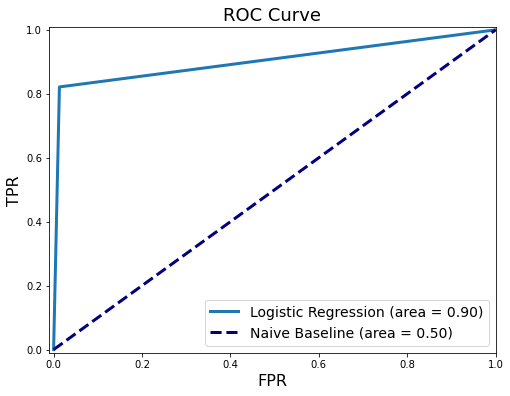

In [330]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

### CART

In [333]:
def accuracy(a, b, c, d):
    return (a + d)/(a+b+c+d)

In [334]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



dtc_test_b = DecisionTreeClassifier(min_samples_leaf=5, 
                              ccp_alpha=0.0005,
                              #class_weight = {0: 1, 1: 20},
                              random_state = 88)
dtc_test_b = dtc_test_b.fit(X_train, y_train)
y_pred_dtc_test_b = dtc_test_b.predict(X_test)
cm_clatree_b = confusion_matrix(y_test, y_pred_dtc_test_b)

accuracy(cm_clatree_b.item((0,0)), cm_clatree_b.item((0,1)), cm_clatree_b.item((1, 0)), cm_clatree_b.item((1, 1)))


0.9509569377990431

### Random Forest Classifier

In [335]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [336]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix: 
 [[1443    5]
 [  64  160]]

Accuracy: 0.958732057416268


### Boosting

In [338]:
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier(n_estimators=3300, max_leaf_nodes=10,)
gbc.fit(X_train, y_train)


GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=3300)

In [340]:
# Accuracy

y_pred = gbc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [341]:
(y_test == y_pred).mean()

0.9659090909090909